In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
df = pd.read_csv('Greenhouse gas and Outages - Sheet1.csv')

In [3]:
df.head()

,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Year,Month
0,2.212132,1.076356,2.991963,-1.760718,0.763482,-118.044000,36.181000,0.0,1.534375,-1.487520,-1.128492,-1.277594,0.831324,-2.946962,1.205094,4.518989,-0.400627,1992,1
1,2.517832,1.904234,2.741266,-1.480846,0.213346,23.491000,40.592000,0.0,1.660791,-1.406646,-1.413140,-1.370631,0.857259,-2.757169,0.956994,4.556087,-0.500930,1992,2
2,1.388318,0.821059,1.735396,-1.396224,0.490418,-118.326000,35.595000,0.0,1.787207,-1.311938,-1.291588,-1.486399,0.880763,-2.688122,1.785988,4.333498,-0.820644,1992,3
3,1.156233,0.054116,2.061096,0.052823,0.965017,-115.682167,33.960833,0.0,2.078695,-1.186371,-1.247993,-1.534503,0.870342,-2.655429,1.393443,4.191851,-1.240662,1992,4
4,0.400976,-0.133942,0.864121,-0.109821,0.584660,-116.265000,33.894000,0.0,1.931384,-1.127843,-1.697274,-1.567542,0.900793,-2.532068,0.931534,4.168243,-1.284544,1992,5


In [4]:
df.columns

Index(['Total Daily Sunspots', 'Northern Total Daily Sunspots',
       'Southern Total Daily Sunspots', 'Earthquake', 'Magnitude', 'Longitude',
       'Latitude', 'OutagesCount', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',
       'CFC-12', 'TSI', 'Aerosols', 'Temp', 'Year', 'Month'],
      dtype='object')

In [5]:
df.isna().sum()

Total Daily Sunspots             0
Northern Total Daily Sunspots    0
Southern Total Daily Sunspots    0
Earthquake                       0
Magnitude                        0
Longitude                        0
Latitude                         0
OutagesCount                     0
MEI                              0
CO2                              0
CH4                              0
N2O                              0
CFC-11                           0
CFC-12                           0
TSI                              0
Aerosols                         0
Temp                             0
Year                             0
Month                            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Daily Sunspots           204 non-null    float64
 1   Northern Total Daily Sunspots  204 non-null    float64
 2   Southern Total Daily Sunspots  204 non-null    float64
 3   Earthquake                     204 non-null    float64
 4   Magnitude                      204 non-null    float64
 5   Longitude                      204 non-null    float64
 6   Latitude                       204 non-null    float64
 7   OutagesCount                   204 non-null    float64
 8   MEI                            204 non-null    float64
 9   CO2                            204 non-null    float64
 10  CH4                            204 non-null    float64
 11  N2O                            204 non-null    float64
 12  CFC-11                         204 non-null    flo

In [7]:
df.describe()

,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Year,Month
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,204.000000,204.000000
mean,0.070416,0.029241,0.100149,-0.483742,0.588878,-89.220036,32.442061,-0.178658,-1.260290e-11,8.137177e-12,-4.313761e-12,4.509857e-12,1.477448e-11,-4.225430e-12,1.504888e-12,-9.705909e-12,9.133853e-12,2000.000000,6.500000
std,1.064006,1.062765,1.032448,0.893399,0.683844,81.788029,21.547524,0.448579,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,4.911031,3.460545
min,-1.235977,-1.104703,-1.189744,-1.760718,-2.236749,-179.970000,-54.075000,-1.029701,-2.002141e+00,-1.832298e+00,-2.663023e+00,-1.567542e+00,-1.943928e+00,-2.946962e+00,-1.527391e+00,-4.285456e-01,-2.676244e+00,1992.000000,1.000000
25%,-0.877454,-0.847042,-0.733558,-1.129938,0.155126,-122.718792,33.540250,-0.472219,-7.575694e-01,-8.700577e-01,-6.669022e-01,-9.820298e-01,-8.957697e-01,-4.111306e-01,-8.734311e-01,-4.057809e-01,-7.344468e-01,1996.000000,3.750000
50%,-0.153385,-0.248459,-0.170517,-0.736137,0.568222,-117.704500,36.531417,0.000000,-3.590085e-02,-5.307094e-02,1.267764e-01,1.061994e-01,1.824918e-01,4.584118e-01,-3.467692e-01,-3.610945e-01,1.886514e-01,2000.000000,6.500000
75%,0.871326,0.774044,0.754441,0.055346,1.060222,-100.118750,39.468500,0.000000,5.624860e-01,8.575594e-01,8.213413e-01,8.037127e-01,9.291587e-01,7.544127e-01,7.378595e-01,-2.557023e-01,7.465852e-01,2004.000000,9.250000
max,3.014593,3.237454,3.051555,4.134842,2.141963,176.152800,65.159200,2.092194,2.841371e+00,1.952816e+00,1.877485e+00,1.815358e+00,1.230072e+00,9.191629e-01,3.266798e+00,4.556087e+00,2.564571e+00,2008.000000,12.000000


In [8]:
%matplotlib inline
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [9]:
df.columns

Index(['Total Daily Sunspots', 'Northern Total Daily Sunspots',
       'Southern Total Daily Sunspots', 'Earthquake', 'Magnitude', 'Longitude',
       'Latitude', 'OutagesCount', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',
       'CFC-12', 'TSI', 'Aerosols', 'Temp', 'Year', 'Month'],
      dtype='object')

<Axes: >

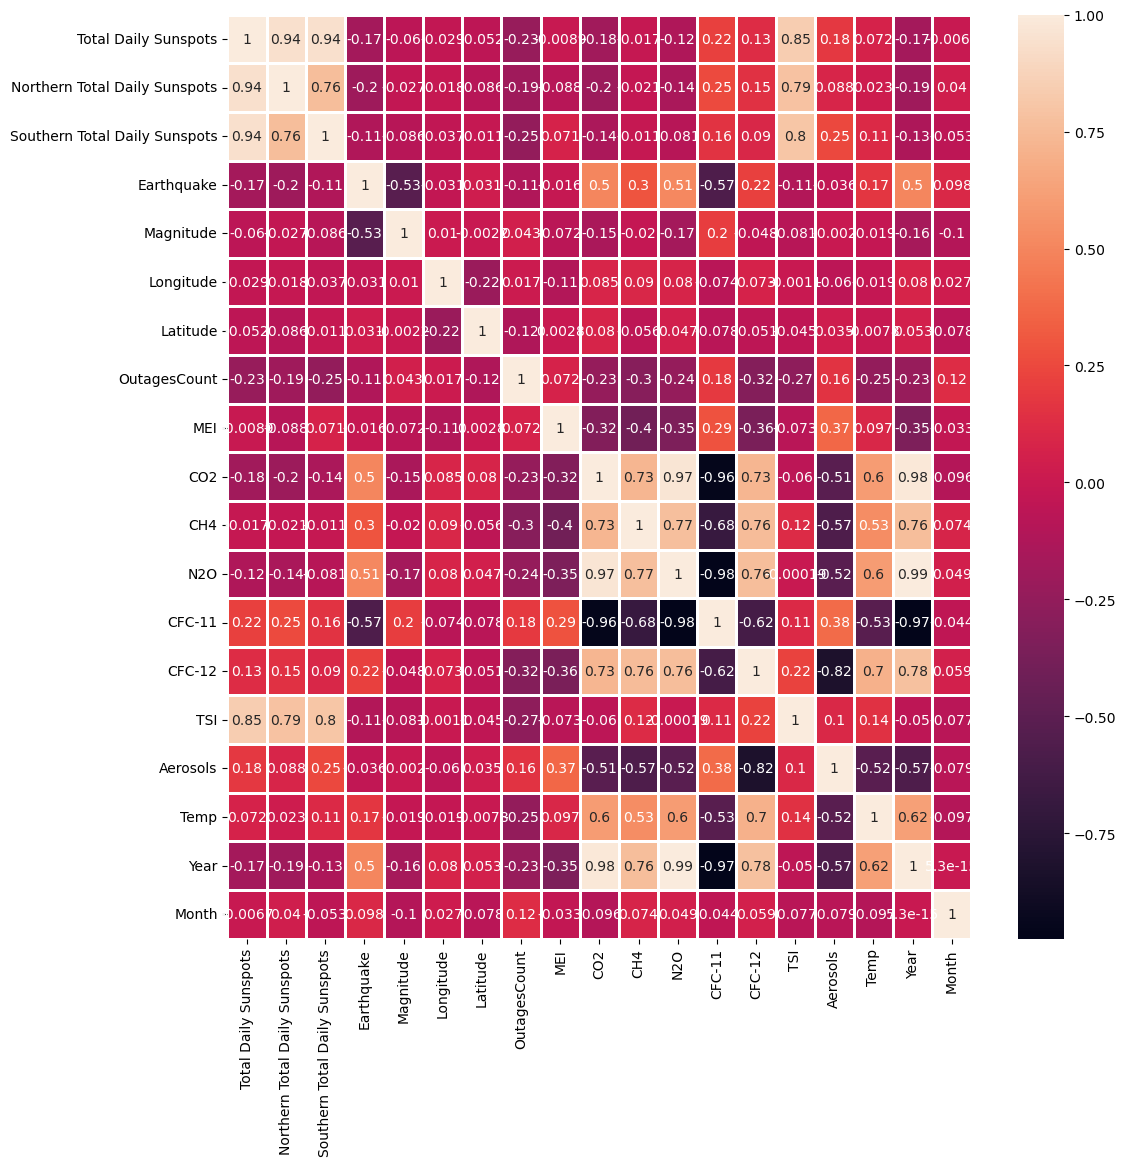

In [10]:
plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidth = 1)

In [31]:
predictors = ['Aerosols', 'Year', 'Month']

outcome = 'Earthquake'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 3)


,Aerosols,Year,Month
0,4.518989,1992,1


In [32]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [33]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [34]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -225.863680665926
  Predictor  coefficient
0  Aerosols     0.308145
1      Year     0.112597
2     Month     0.024633

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6575
            Mean Absolute Error (MAE) : 0.4714
          Mean Percentage Error (MPE) : 77.5020
Mean Absolute Percentage Error (MAPE) : 128.5595


In [39]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     17.95
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.16e-09
Time:                        22:43:40   Log-Likelihood:                -121.96
No. Observations:                 122   AIC:                             251.9
Df Residuals:                     118   BIC:                             263.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -225.8637     31.362     -7.202      0.0

# Just Aerosol

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: -225.863680665926
  Predictor  Coefficient
0  Aerosols     0.308145
1      Year     0.112597
2     Month     0.024633
Mean Squared Error: 0.43234519825845225
R^2: 0.3133274805837061


In [41]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127  -0.375160 -0.886166 -0.511006
203   0.424933  0.591218  0.166285
18   -0.972526 -0.895482  0.077044
175   0.096011 -0.020542 -0.116553
196   0.236913  2.607384  2.370471
31   -1.117968 -1.213395 -0.095427
28   -1.158612 -1.093838  0.064774
40   -1.155135 -1.292194 -0.137059
95   -0.614417 -1.091121 -0.476704
38   -1.195048 -1.353137 -0.158089
145  -0.294647  0.240310  0.534957
44   -1.072192 -0.110210  0.961982
51   -1.105623 -1.156722 -0.051099
69   -0.857699 -0.883837 -0.026138
4    -0.163743 -0.109821  0.053922
93   -0.663683 -0.018601  0.645082
172   0.010680  0.369959  0.359279
150  -0.172521  0.054764  0.227285
11   -0.600304 -0.967682 -0.367379
117  -0.438490 -1.145853 -0.707363


C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_39892\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


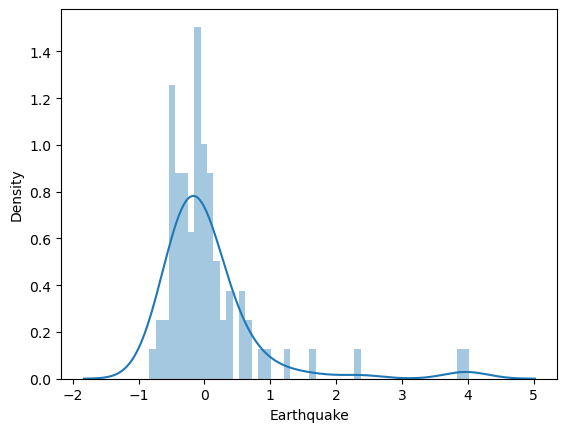

In [42]:
sns.distplot((valid_y-lm_pred),bins=50);

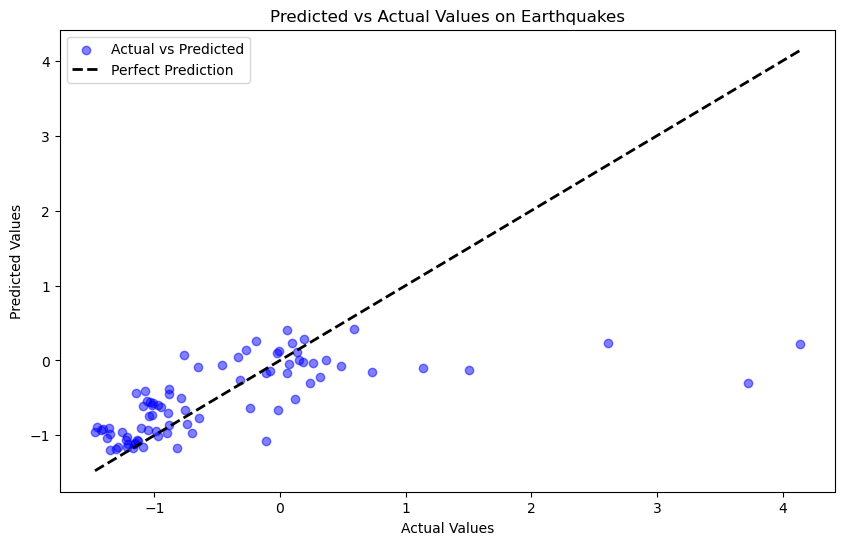

In [43]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [20]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Aerosols, CO2, N2O, Year, Month
Start: score=245.72
Step: score=243.91, remove CO2
Step: score=243.91, remove None
['Aerosols', 'N2O', 'Year', 'Month']


In [21]:
predictors = ['Aerosols']

outcome = 'Earthquake'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 1)


,Aerosols
0,4.518989


In [22]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [23]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [24]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -0.5008452653468012
  Predictor  coefficient
0  Aerosols     0.006918

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.7935
            Mean Absolute Error (MAE) : 0.6508
          Mean Percentage Error (MPE) : -312.5901
Mean Absolute Percentage Error (MAPE) : 526.8383


In [25]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.01130
Date:                Wed, 08 May 2024   Prob (F-statistic):              0.916
Time:                        22:42:28   Log-Likelihood:                -144.88
No. Observations:                 122   AIC:                             293.8
Df Residuals:                     120   BIC:                             299.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5008      0.073     -6.907      0.0

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: -0.5008452653468012
  Predictor  Coefficient
0  Aerosols     0.006918
Mean Squared Error: 0.6295642703858902
R^2: 9.417145895473933e-05


In [27]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127  -0.503693 -0.886166 -0.382473
203  -0.503110  0.591218  1.094328
18   -0.493801 -0.895482 -0.401682
175  -0.503227 -0.020542  0.482685
196  -0.503460  2.607384  3.110844
31   -0.500147 -1.213395 -0.713248
28   -0.499400 -1.093838 -0.594438
40   -0.501850 -1.292194 -0.790344
95   -0.503693 -1.091121 -0.587428
38   -0.501640 -1.353137 -0.851497
145  -0.503623  0.240310  0.743933
44   -0.502200 -0.110210  0.391990
51   -0.502713 -1.156722 -0.654009
69   -0.502993 -0.883837 -0.380844
4    -0.472008 -0.109821  0.362187
93   -0.503693 -0.018601  0.485092
172  -0.503483  0.369959  0.873443
150  -0.503647  0.054764  0.558410
11   -0.485681 -0.967682 -0.482001
117  -0.503693 -1.145853 -0.642160


C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_39892\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


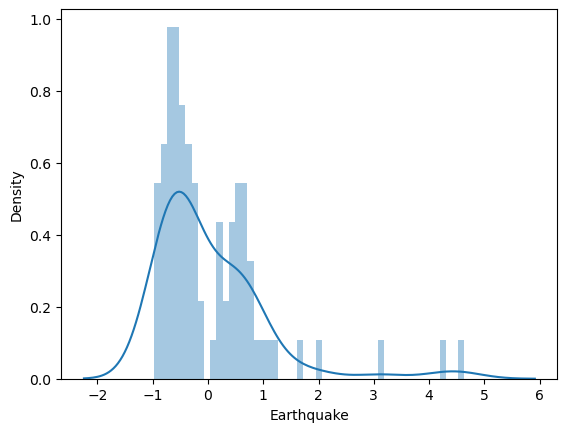

In [28]:
sns.distplot((valid_y-lm_pred),bins=50);

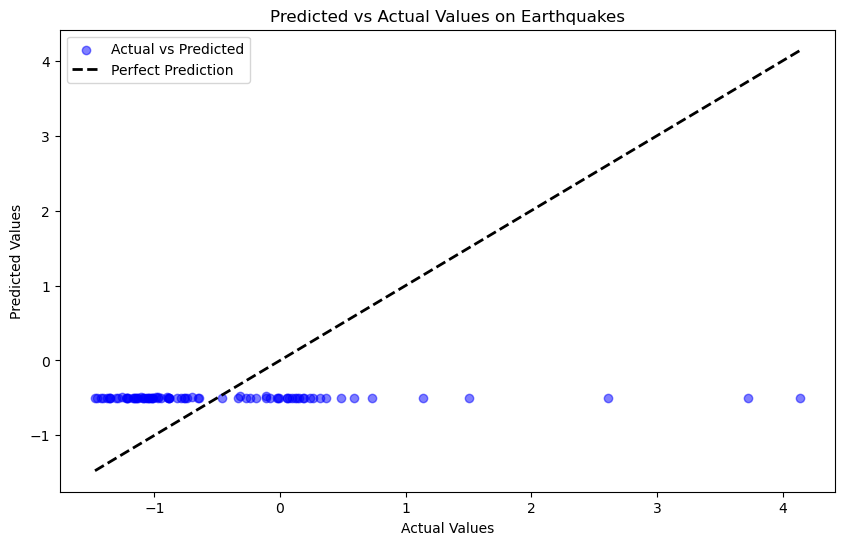

In [29]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [30]:
#Aerosol

In [115]:
# Analysis on Magnitude

In [116]:
# Exploratory analysis 
# Aerosol Levels, find trends 

# Aerosol and Magnitude Regression

In [117]:
df.columns 

Index(['Total Daily Sunspots', 'Northern Total Daily Sunspots',
       'Southern Total Daily Sunspots', 'Earthquake', 'Magnitude', 'Longitude',
       'Latitude', 'OutagesCount', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',
       'CFC-12', 'TSI', 'Aerosols', 'Temp', 'Year', 'Month'],
      dtype='object')

In [118]:
df['OutagesCount']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
199    0.531247
200    1.646209
201   -0.918204
202   -0.695212
203    0.865736
Name: OutagesCount, Length: 204, dtype: float64

In [119]:
df2 = df[df['OutagesCount'] != 0]

In [120]:
df2['OutagesCount'].count()

93

In [121]:
predictors = ['Aerosols', 'CO2', 'N2O', 'Year', 'Month']

outcome = 'Magnitude'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 5)


,Aerosols,CO2,N2O,Year,Month
0,4.518989,-1.48752,-1.277594,1992,1


In [122]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [123]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [124]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  664.9221856877524
  Predictor  coefficient
0  Aerosols    -0.183628
1       CO2     0.483330
2       N2O     1.020463
3      Year    -0.332063
4     Month    -0.028862

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6484
            Mean Absolute Error (MAE) : 0.5133
          Mean Percentage Error (MPE) : -248.5266
Mean Absolute Percentage Error (MAPE) : 658.6082


In [125]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.244
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.293
Time:                        15:30:22   Log-Likelihood:                -120.26
No. Observations:                 122   AIC:                             252.5
Df Residuals:                     116   BIC:                             269.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        664.9222    423.253      1.571      0.1

In [126]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: 664.9221856877524
  Predictor  Coefficient
0  Aerosols    -0.183628
1       CO2     0.483330
2       N2O     1.020463
3      Year    -0.332063
4     Month    -0.028862
Mean Squared Error: 0.4204791347201579
R^2: 0.05089478120394553


In [127]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127   0.491872  0.012254 -0.479618
203   0.499388 -0.523315 -1.022703
18    0.740805  0.507566 -0.233239
175   0.411832  0.747089  0.335257
196   0.656400 -1.256903 -1.913303
31    0.510298  0.333955 -0.176343
28    0.780257  0.540691 -0.239565
40    0.800616  1.818925  1.018309
95    0.687064  1.115156  0.428093
38    0.830817  1.111990  0.281173
145   0.657113  0.160161 -0.496952
44    0.404427 -0.464034 -0.868461
51    0.797630  0.570407 -0.227223
69    0.458792  0.411695 -0.047097
4     0.399017  0.584660  0.185644
93    0.546287  1.435919  0.889632
172   0.716104  0.420907 -0.295197
150   0.484675 -0.469921 -0.954596
11    0.598572  0.862147  0.263575
117   0.485635  1.289011  0.803376


C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_161980\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


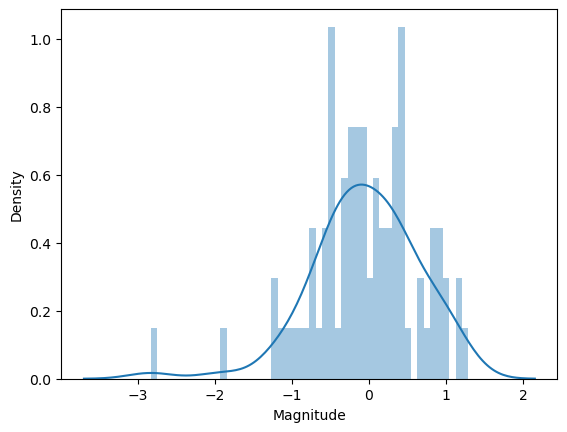

In [128]:
sns.distplot((valid_y-lm_pred),bins=50);

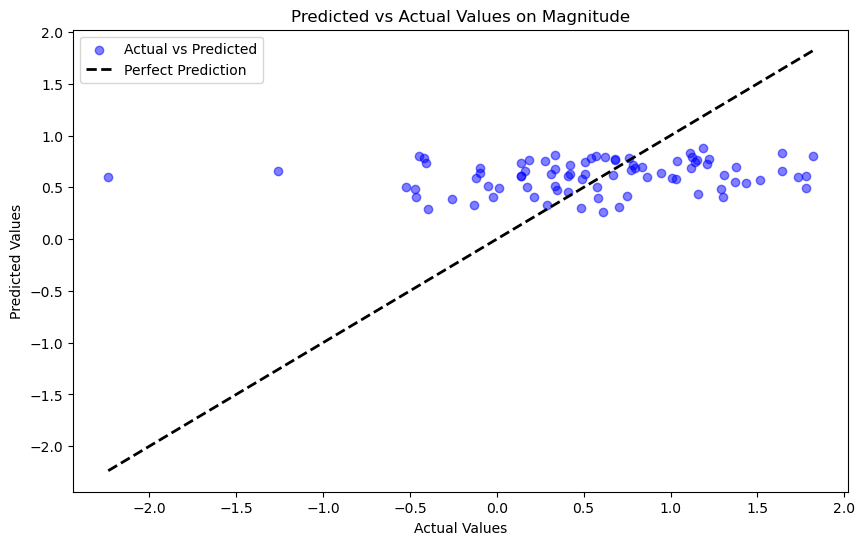

In [129]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Magnitude')
plt.legend()
plt.show()

In [130]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Aerosols, CO2, N2O, Year, Month
Start: score=254.53
Step: score=253.96, remove N2O
Step: score=252.51, remove Month
Step: score=252.51, remove None
['Aerosols', 'CO2', 'Year']


In [131]:
# Best Variables
predictors = ['Aerosols', 'CO2', 'Year']

outcome = 'Magnitude'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 3)


,Aerosols,CO2,Year
0,4.518989,-1.48752,1992


In [132]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [133]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [134]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  251.86652635248012
  Predictor  coefficient
0  Aerosols    -0.102217
1       CO2     0.525870
2      Year    -0.125625

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6537
            Mean Absolute Error (MAE) : 0.5157
          Mean Percentage Error (MPE) : -181.0419
Mean Absolute Percentage Error (MAPE) : 602.4051


In [135]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.442
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.234
Time:                        15:30:22   Log-Likelihood:                -121.25
No. Observations:                 122   AIC:                             250.5
Df Residuals:                     118   BIC:                             261.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        251.8665    134.253      1.876      0.0

In [136]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: 251.86652635248012
  Predictor  Coefficient
0  Aerosols    -0.102217
1       CO2     0.525870
2      Year    -0.125625
Mean Squared Error: 0.4273607735685824
R^2: 0.03536155064482105


In [137]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127   0.501005  0.012254 -0.488752
203   0.506959 -0.523315 -1.030274
18    0.679091  0.507566 -0.171525
175   0.473980  0.747089  0.273109
196   0.676651 -1.256903 -1.933554
31    0.647233  0.333955 -0.313278
28    0.874588  0.540691 -0.333897
40    0.902115  1.818925  0.916810
95    0.665795  1.115156  0.449361
38    0.787094  1.111990  0.324897
145   0.586716  0.160161 -0.426555
44    0.590556 -0.464034 -1.054590
51    0.830655  0.570407 -0.260248
69    0.496521  0.411695 -0.084826
4     0.601929  0.584660 -0.017269
93    0.515264  1.435919  0.920655
172   0.731269  0.420907 -0.310362
150   0.572511 -0.469921 -1.042433
11    0.578986  0.862147  0.283161
117   0.435809  1.289011  0.853202


C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_161980\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


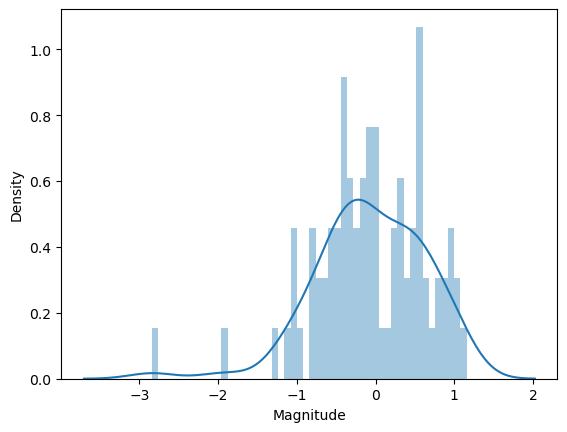

In [138]:
sns.distplot((valid_y-lm_pred),bins=50);

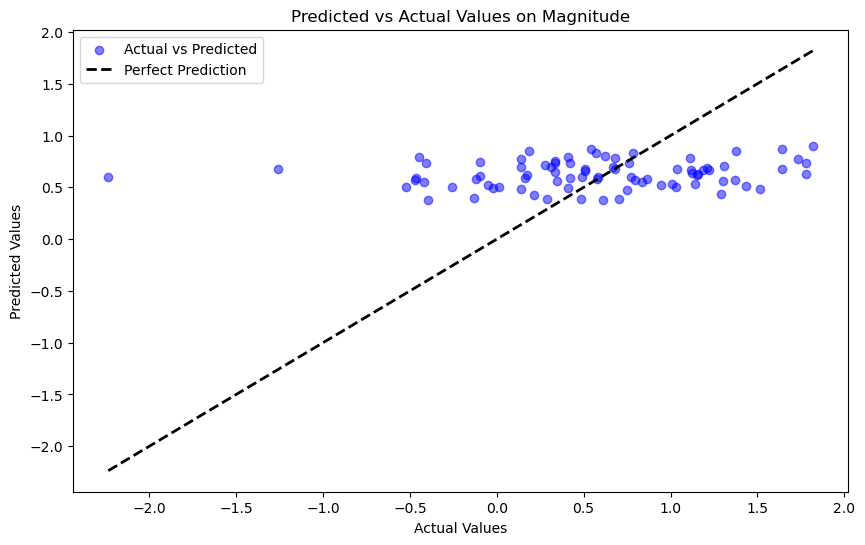

In [139]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Magnitude')
plt.legend()
plt.show()

In [140]:
# Suppose 'column_to_split' is the column you want to split
# Suppose you want to split it into 4 bins
num_bins = 3

# Specify the labels for the bins
bin_labels = ['Low', 'Medium', 'High']

# Use cut() function to create bins
df['column_bins'] = pd.cut(df['Aerosols'], bins=num_bins, labels=bin_labels)

# Now df['column_bins'] will contain the bin labels for each value in 'column_to_split'


In [141]:
df['column_bins'].value_counts()

column_bins
Low       187
High        9
Medium      8
Name: count, dtype: int64

Aerosols_bins
Very Low    -0.465353
Low         -0.865550
Medium      -1.248816
High        -0.042862
Very High   -0.280451
Name: Earthquake, dtype: float64


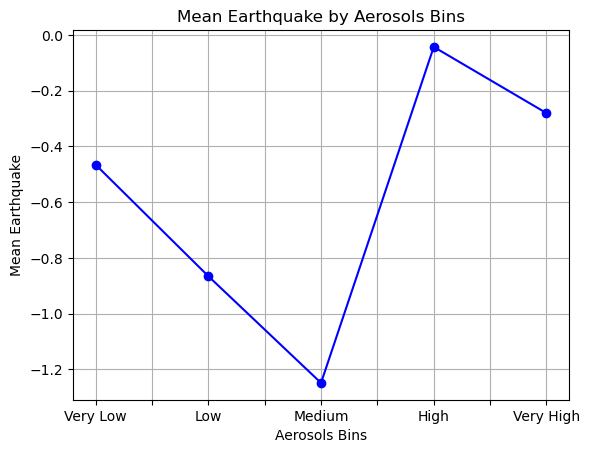

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "Aerosols" and "Earthquake"

# Define the number of bins and bin labels
num_bins = 5  # You can adjust this as needed
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Split the Aerosols column into bins
df['Aerosols_bins'] = pd.cut(df['Aerosols'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df.groupby('Aerosols_bins')['Earthquake'].mean()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a line plot
summary_stats.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Aerosols Bins')
plt.ylabel('Mean Earthquake')
plt.title('Mean Earthquake by Aerosols Bins')
plt.grid(True)
plt.show()



Aerosols_bins
Low      -0.701008
Medium   -1.048810
High     -0.109821
Name: Earthquake, dtype: float64


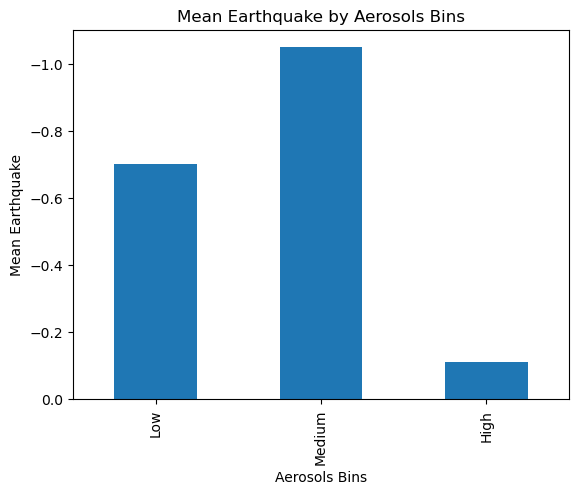

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "Aerosols" and "Earthquake"

# Define the number of bins and bin labels
num_bins = 3  # You can adjust this as needed
bin_labels = ['Low', 'Medium', 'High']

# Split the Aerosols column into bins
df['Aerosols_bins'] = pd.cut(df['Aerosols'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df.groupby('Aerosols_bins')['Earthquake'].median()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a bar plot
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Earthquake', title='Mean Earthquake by Aerosols Bins')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

In [144]:
df["Aerosols_bins"].value_counts()

Aerosols_bins
Low       187
High        9
Medium      8
Name: count, dtype: int64

# Improved Aerosols

In [145]:
predictors = ['Aerosols', 'N2O', 'Year', 'Month']

outcome = 'Earthquake'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 4)


,Aerosols,N2O,Year,Month
0,4.518989,-1.277594,1992,1


In [146]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [147]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [148]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -1435.7813103798142
  Predictor  coefficient
0  Aerosols     0.532074
1       N2O    -2.865113
2      Year     0.717407
3     Month     0.072166

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6260
            Mean Absolute Error (MAE) : 0.4416
          Mean Percentage Error (MPE) : 151.5596
Mean Absolute Percentage Error (MAPE) : 212.2267


In [149]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.06e-11
Time:                        15:30:22   Log-Likelihood:                -115.96
No. Observations:                 122   AIC:                             241.9
Df Residuals:                     117   BIC:                             255.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1435.7813    349.109     -4.113      0.0

In [150]:
df2.head()

,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Year,Month
96,1.076999,0.774832,1.211398,-0.845796,0.328951,-116.3550,34.6920,-0.806708,-1.544536,-0.095636,1.275879,-0.038246,0.370982,0.677846,1.720780,-0.411683,-0.739148,2000,1
98,2.551549,1.649988,3.051555,-1.018921,0.678981,-117.5950,36.0800,-0.806708,-1.482895,0.043765,0.756334,-0.040096,0.301398,0.650297,1.099359,-0.411683,0.025660,2000,3
99,1.986791,1.684658,1.985065,-0.891600,0.334007,-118.8233,38.0899,-0.806708,-0.838277,0.177846,0.495279,-0.029788,0.254507,0.680287,1.535549,-0.411683,0.727778,2000,4
100,1.648499,1.671000,1.379899,-0.701008,0.375457,-115.9840,31.7200,-0.249227,-0.129929,0.144857,-0.173514,0.031796,0.206690,0.703739,0.785531,-0.411683,-0.369282,2000,5
101,1.928349,2.779390,0.807612,-0.842303,0.774488,15.1010,46.4330,-0.695212,-0.450671,0.166140,-0.249420,0.078579,0.179134,0.730765,1.018304,-0.411683,-0.488392,2000,6


In [151]:
df2["Earthquake_Lag"] = df2["Earthquake"].shift(1)

C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_161980\3800467180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Earthquake_Lag"] = df2["Earthquake"].shift(1)


In [152]:
df2.isna().sum()

Total Daily Sunspots             0
Northern Total Daily Sunspots    0
Southern Total Daily Sunspots    0
Earthquake                       0
Magnitude                        0
Longitude                        0
Latitude                         0
OutagesCount                     0
MEI                              0
CO2                              0
CH4                              0
N2O                              0
CFC-11                           0
CFC-12                           0
TSI                              0
Aerosols                         0
Temp                             0
Year                             0
Month                            0
Earthquake_Lag                   1
dtype: int64

In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 96 to 203
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Daily Sunspots           93 non-null     float64
 1   Northern Total Daily Sunspots  93 non-null     float64
 2   Southern Total Daily Sunspots  93 non-null     float64
 3   Earthquake                     93 non-null     float64
 4   Magnitude                      93 non-null     float64
 5   Longitude                      93 non-null     float64
 6   Latitude                       93 non-null     float64
 7   OutagesCount                   93 non-null     float64
 8   MEI                            93 non-null     float64
 9   CO2                            93 non-null     float64
 10  CH4                            93 non-null     float64
 11  N2O                            93 non-null     float64
 12  CFC-11                         93 non-null     float64


In [154]:
df3 = df2.dropna()

In [155]:
df2.head(20)

,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Year,Month,Earthquake_Lag
96,1.076999,0.774832,1.211398,-0.845796,0.328951,-116.355000,34.692000,-0.806708,-1.544536,-0.095636,1.275879,-0.038246,0.370982,0.677846,1.720780,-0.411683,-0.739148,2000,1,NaN
98,2.551549,1.649988,3.051555,-1.018921,0.678981,-117.595000,36.080000,-0.806708,-1.482895,0.043765,0.756334,-0.040096,0.301398,0.650297,1.099359,-0.411683,0.025660,2000,3,-0.845796
99,1.986791,1.684658,1.985065,-0.891600,0.334007,-118.823300,38.089900,-0.806708,-0.838277,0.177846,0.495279,-0.029788,0.254507,0.680287,1.535549,-0.411683,0.727778,2000,4,-1.018921
100,1.648499,1.671000,1.379899,-0.701008,0.375457,-115.984000,31.720000,-0.249227,-0.129929,0.144857,-0.173514,0.031796,0.206690,0.703739,0.785531,-0.411683,-0.369282,2000,5,-0.891600
101,1.928349,2.779390,0.807612,-0.842303,0.774488,15.101000,46.433000,-0.695212,-0.450671,0.166140,-0.249420,0.078579,0.179134,0.730765,1.018304,-0.411683,-0.488392,2000,6,-0.701008
102,3.014593,3.237454,2.345699,-0.943227,1.123707,-116.297667,34.723833,-0.918204,-0.503954,-0.031788,-0.395077,0.133820,0.182260,0.738873,1.342264,-0.411683,-0.431971,2000,7,-0.842303
103,1.901937,2.185797,1.339829,-1.020862,0.833487,-118.220000,37.847800,-0.472219,-0.440223,-0.207370,-0.778197,0.148885,0.180408,0.741663,2.377273,-0.411683,0.050735,2000,8,-0.943227
107,1.254574,1.684658,0.646303,-0.777866,0.001600,-114.980000,36.051000,-1.029701,-0.900963,-0.050943,0.695302,0.238222,0.172072,0.794930,2.313364,-0.411683,-0.946023,2000,12,-1.020862
108,1.242773,1.551231,0.755212,-0.754576,-0.420506,-118.450000,34.281000,-0.918204,-0.857083,0.039508,0.614780,0.251173,0.154820,0.804084,1.876655,-0.411683,-0.005685,2001,1,-0.777866
110,1.646813,1.613216,1.433326,-1.006111,0.789973,-149.623500,61.426100,-0.472219,-0.928127,0.253399,1.227669,0.224478,0.085931,0.789263,0.918025,-0.411683,0.909577,2001,3,-0.754576


In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 98 to 203
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Daily Sunspots           92 non-null     float64
 1   Northern Total Daily Sunspots  92 non-null     float64
 2   Southern Total Daily Sunspots  92 non-null     float64
 3   Earthquake                     92 non-null     float64
 4   Magnitude                      92 non-null     float64
 5   Longitude                      92 non-null     float64
 6   Latitude                       92 non-null     float64
 7   OutagesCount                   92 non-null     float64
 8   MEI                            92 non-null     float64
 9   CO2                            92 non-null     float64
 10  CH4                            92 non-null     float64
 11  N2O                            92 non-null     float64
 12  CFC-11                         92 non-null     float64


<Axes: >

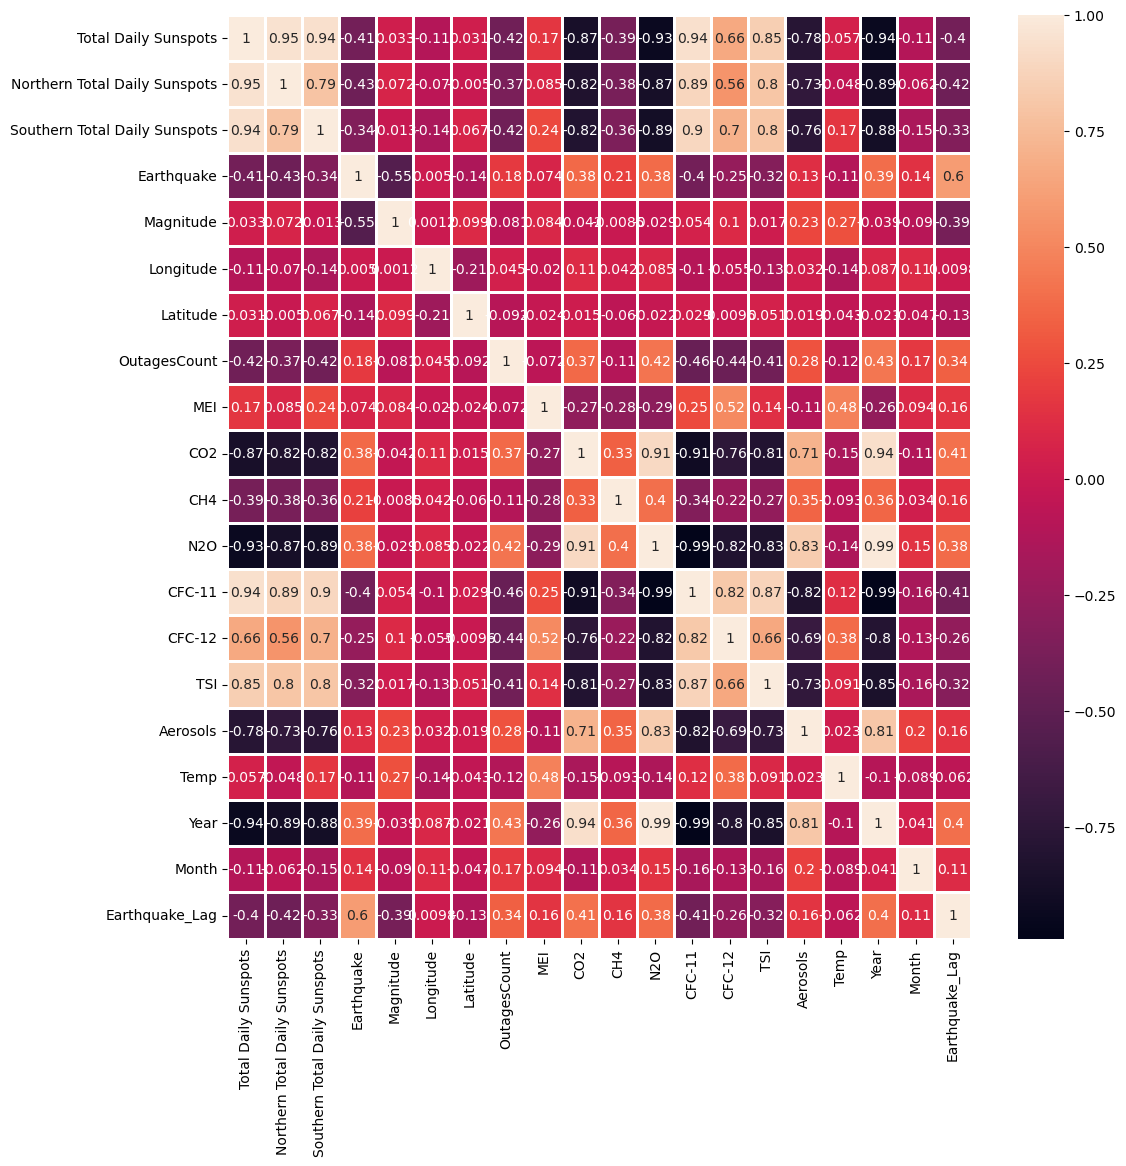

In [157]:
plt.subplots(figsize = (12, 12))
sns.heatmap(df3.corr(), annot = True, linewidth = 1)

In [158]:
predictors = ['Aerosols', 'N2O', 'Year', 'Month']

outcome = 'Earthquake_Lag'

X = df3[predictors]
y = df3[outcome]

print(X.shape)
X.head(1)

(92, 4)


,Aerosols,N2O,Year,Month
98,-0.411683,-0.040096,2000,3


In [159]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [160]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [161]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -1980.6750373181007
  Predictor  coefficient
0  Aerosols    -8.429161
1       N2O    -3.928422
2      Year     0.987972
3     Month     0.115751

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.7315
            Mean Absolute Error (MAE) : 0.4244
          Mean Percentage Error (MPE) : 46.2062
Mean Absolute Percentage Error (MAPE) : 125.5164


In [162]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Earthquake_Lag   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     5.829
Date:                Tue, 07 May 2024   Prob (F-statistic):           0.000626
Time:                        15:30:23   Log-Likelihood:                -60.849
No. Observations:                  55   AIC:                             131.7
Df Residuals:                      50   BIC:                             141.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1980.6750    802.944     -2.467      0.0

# No other predictors

In [163]:
predictors = ['Aerosols','Year', 'Month']

outcome = 'Earthquake'

X = df[predictors]
y = df[outcome]

print(X.shape)
X.head(1)

(204, 3)


,Aerosols,Year,Month
0,4.518989,1992,1


In [164]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [165]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [166]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -225.863680665926
  Predictor  coefficient
0  Aerosols     0.308145
1      Year     0.112597
2     Month     0.024633

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6575
            Mean Absolute Error (MAE) : 0.4714
          Mean Percentage Error (MPE) : 77.5020
Mean Absolute Percentage Error (MAPE) : 128.5595


In [167]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.16e-09
Time:                        15:30:23   Log-Likelihood:                -121.96
No. Observations:                 122   AIC:                             251.9
Df Residuals:                     118   BIC:                             263.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -225.8637     31.362     -7.202      0.0

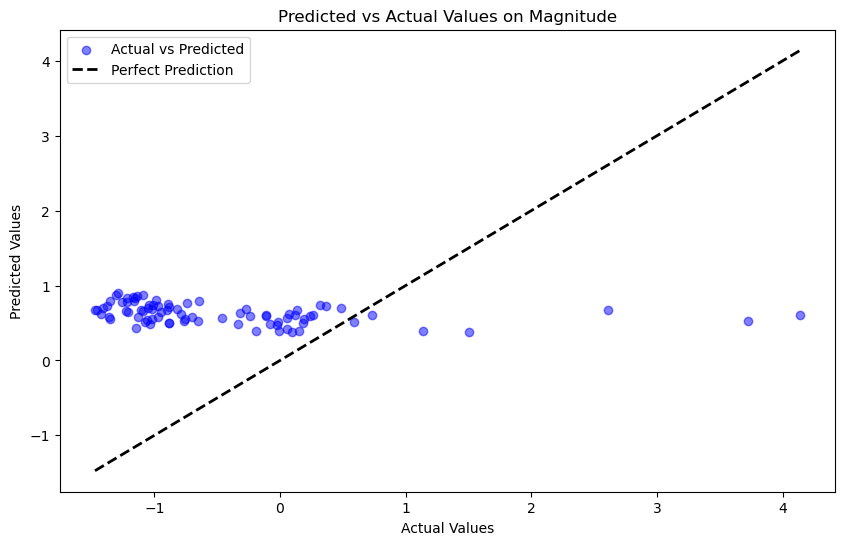

In [168]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Magnitude')
plt.legend()
plt.show()